# Game market analysis

Objectives of the analysis:
- Identify the parameters that influence the success of the game in different regions of the world.
- Prepare a report for a computer games store to aid in advertising campaign planning based on the identified parameters.
- Compile user portraits for each region to gain insights into user preferences and behavior.
- Test hypotheses regarding the equality of average user ratings for the Xbox One and PC platforms and the difference in average user ratings between Action and Sports genres using Student's test for independent samples.


**Summary**  
The parameters determining the success of the game in different regions of the world were revealed. Based on this, a report was prepared for a computer games store for advertising campaign planning. Pre-processing of the data and analysis was carried out. Selected a relevant period for analysis. Portraits of users in each region were compiled. Hypotheses were tested: average user ratings for Xbox One and PC platforms are the same; average user ratings for Action and Sports genres are different. The analysis used Student's test for independent samples.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy import stats as st

In [2]:
# add some options
sns.set_theme(style="dark")
pd.set_option("display.max.columns", None)

## Data's reading

In [3]:
try:
    df = pd.read_csv('datasets\\games.csv')
except:
    df = pd.read_csv('datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Initial Data Analysis

### columns' names

In [4]:
for column in df.columns:
    df.rename(columns={column: column.lower()}, inplace=True)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### data types

In [5]:
df.isnull().sum() * 100 / len(df)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [ ]:
df = df.dropna(subset=['year_of_release'])

df.year_of_release = pd.to_numeric(df.year_of_release)

In [ ]:
df.user_score = df.user_score.replace('tbd', np.nan)

df.user_score = pd.to_numeric(df.user_score)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### nan

In [9]:
# проверю долю пропусков в каждом столбце
display(df.isna().mean())
# больше всего пропусков в critic_score, user_score и rating, но с ними ничего не поделать - средние данные не возьмешь. Придется оставить, как есть 

# строки с пропущенным name удалю полностью
df = df.dropna(subset=['name'])

# много пропусков в rating. Попробую понять причину, но удалять не буду
print(df.query('rating.isna()').year_of_release.mean())
print(df.query('rating.notna()').year_of_release.mean())

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.546212
rating             0.406056
dtype: float64

2004.8834631515879
2007.5816953316953


**possible reasons for na:**
* year_of_release -> some games have not been released yet or the year of their release is not exactly known (probably for older games)
* critic_score -> some games have not been rated by critics or they have been rated, but one review is not enough to give a rating. Perhaps it is the rules of the rating system.
* user_score - perhaps users have not yet had a chance to put their scores or a score for the game is not calculated
* it is supposed that some games were added quite recently and there is no data on them
* age rating is not available for earlier games. Perhaps there was no rating system in its current form when they were released. Or getting a rating was voluntary

### total sales

In [10]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

## Exploratory Data Analysis

In [ ]:
print('Unique titles in dataset', df.name.nunique())
print('Cross-platform titles', df.name.duplicated().sum())
print('Timeline of releases', df.year_of_release.min(), '-', df.year_of_release.max(), 'years' )
print('Genres count', df.genre.nunique())
print('Platforms count', df.platform.nunique())

display(df.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending=False))


Уникальных тайтлов в датасете 11426
Игр для нескольких платформ 5018
в датасете игры с 1980.0 по 2016.0 годы
жанров 12
платформ 31


,name
genre,
Action,3307
Sports,2306
Misc,1721
Role-Playing,1481
Shooter,1296
Adventure,1293
Racing,1226
Platform,878
Simulation,857


**Conclusion**
1. The data has information about 11559 games for 31 platforms. 
2. 5145 games were released for multiple platforms
3. The dataset contains games from 1980 to 2016. Game releases by year will be evaluated below
4. there are 31 platforms in the dataset
5. 12 genres have been collected in total. The most popular are Action, Sport, Role-Playing
6. The rating field contains information about game's age rating by Entertainment Software Rating Board (ESRB). Learn more about the rating at https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board.

### dynamic of games' releases 

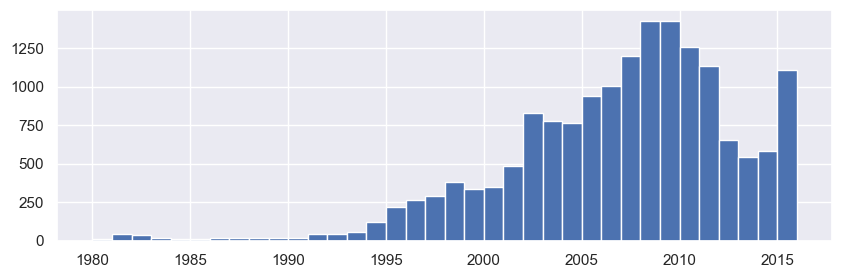

In [12]:
# Важны ли данные за все периоды?
df.year_of_release.hist(figsize=(10,3), bins=36);

**conclusion**
1. the first big spike in game releases occurred in 2003
2. there was a rise in new game releases from 2006 to 2010 - the golden age
3. new game releases declined from 2011 to 2015
4. there was another surge in 2016. A lot of new games came out. But this doesn't mean that sales grew.
5. 1980 to 2002 was a period of industry formation and conclusions based on this data may be wrong

### sales dynamic by platforms

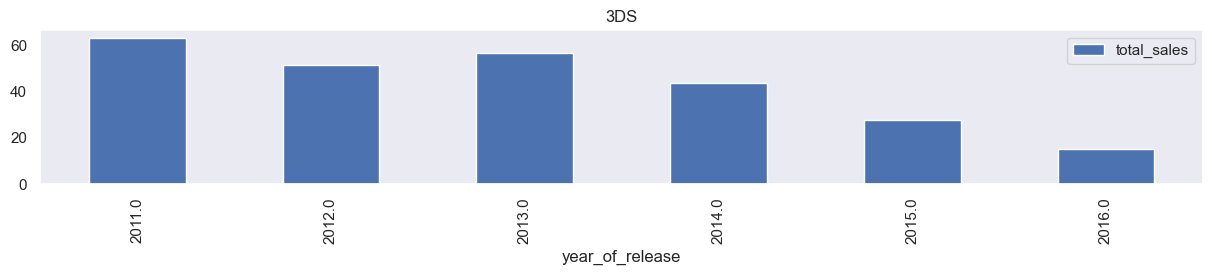

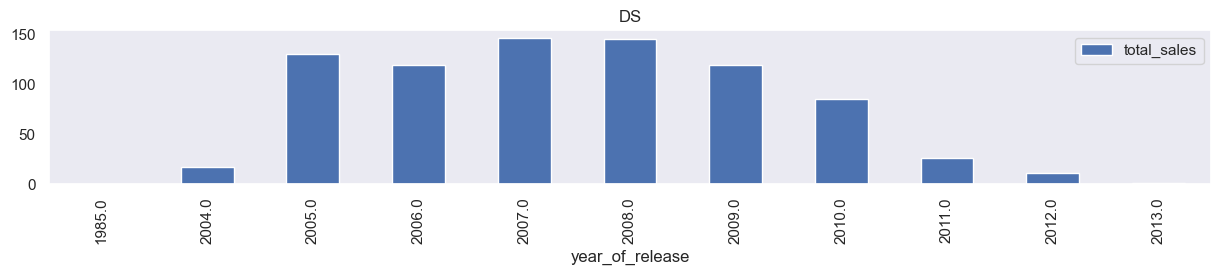

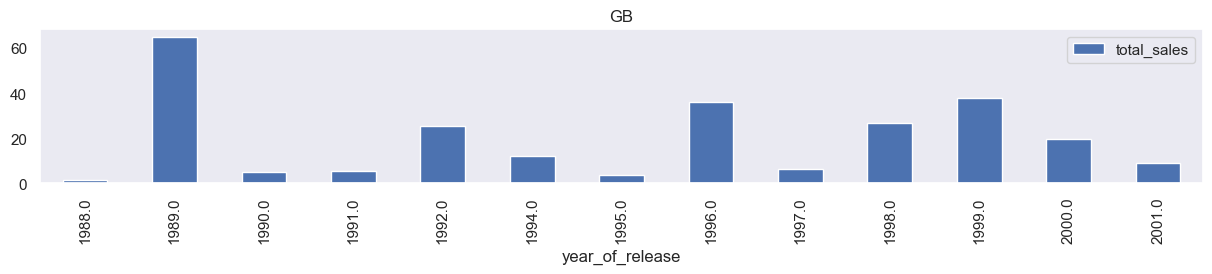

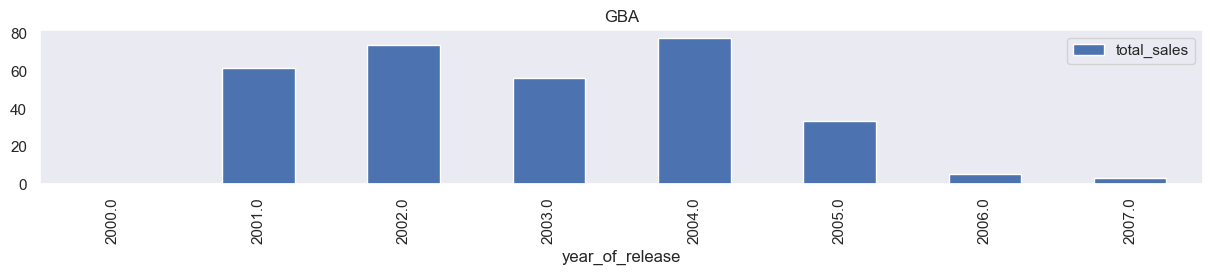

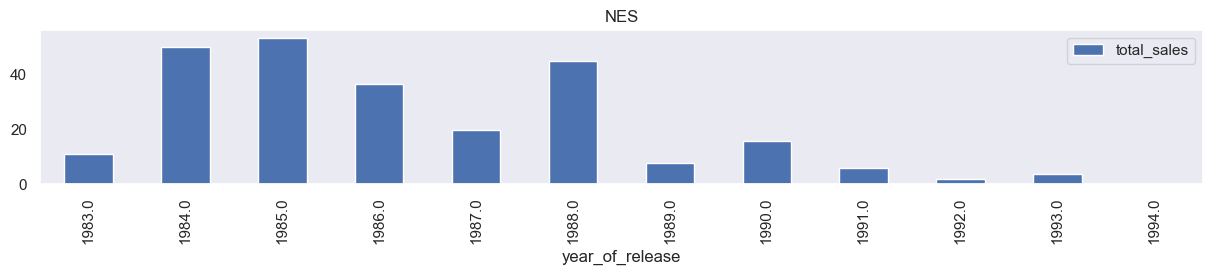

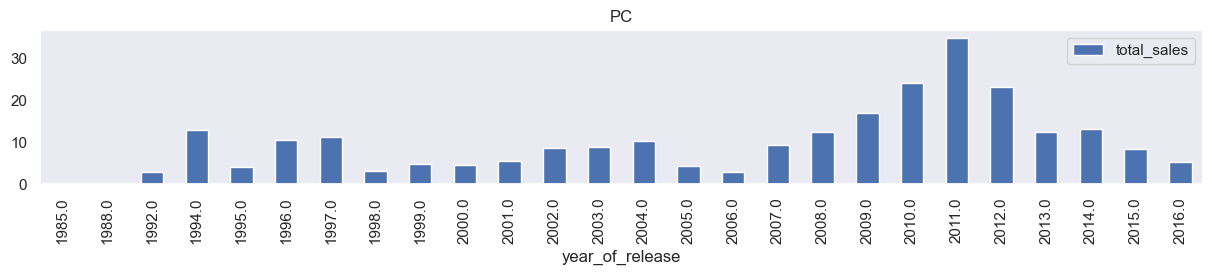

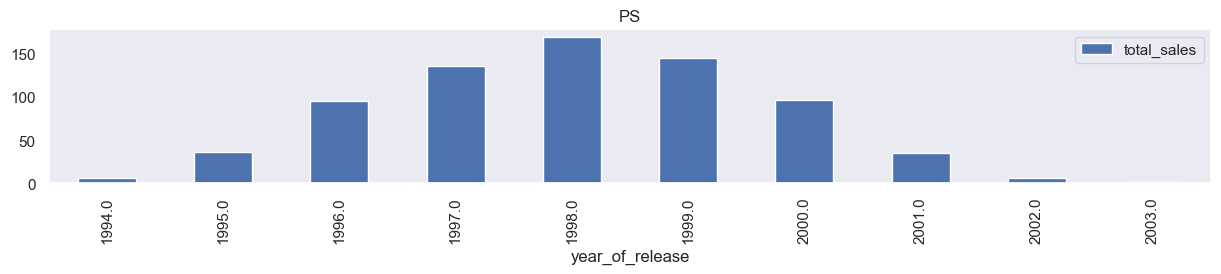

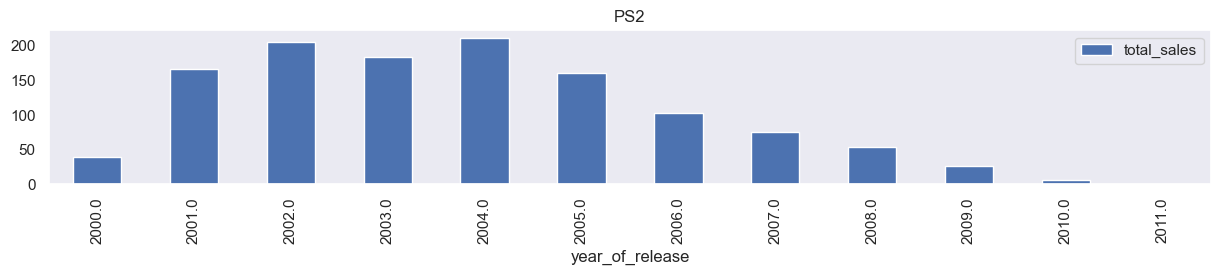

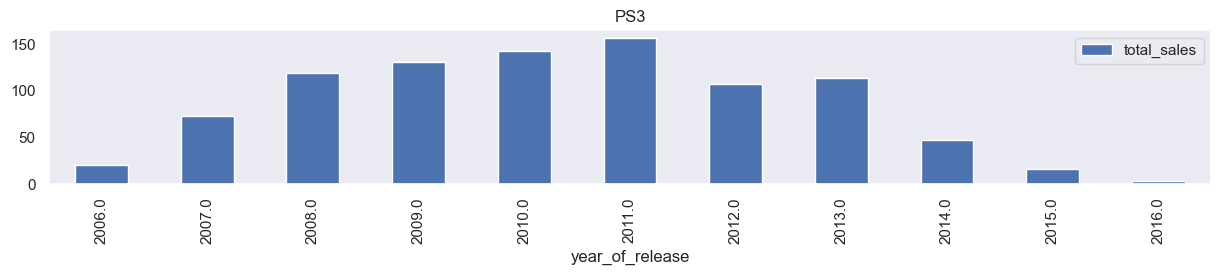

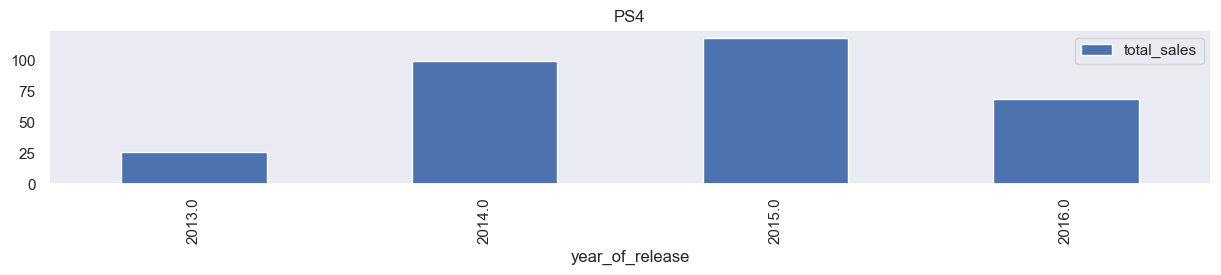

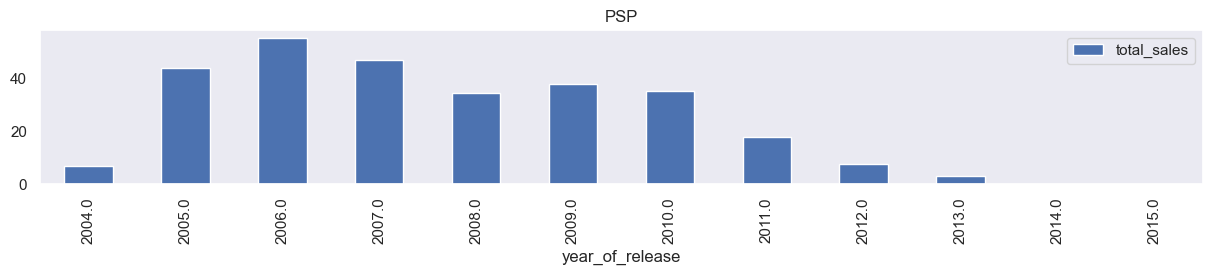

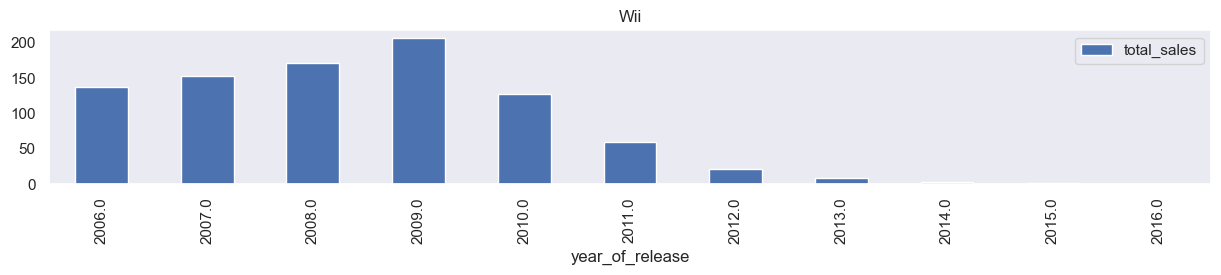

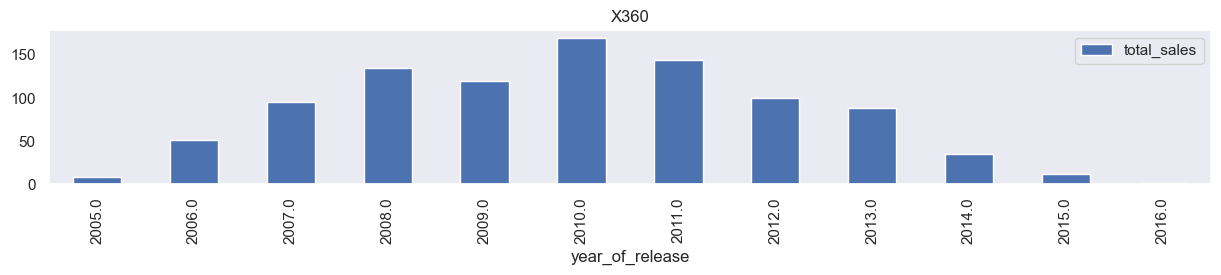

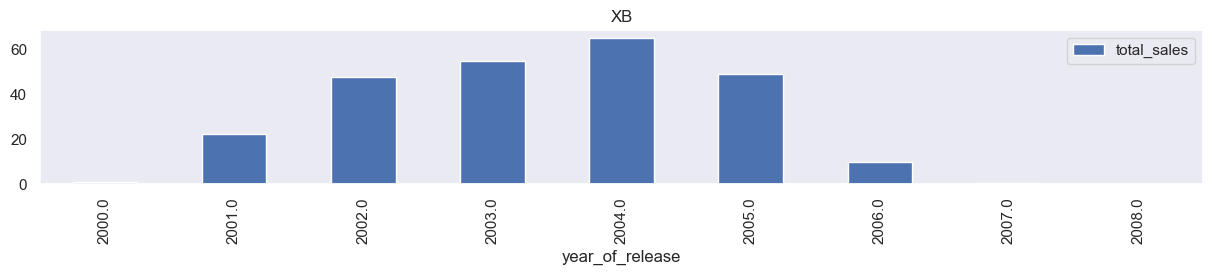

In [13]:
# Выберите платформы с наибольшими суммарными продажами 
# наиболее популярные платформы выберем по правилу Парето - 80% продаж
best_platform = df.copy()
best_platforms = best_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
pareto = best_platform.total_sales.sum() * .8 / best_platform.platform.nunique()
best_platforms = best_platforms.query('total_sales >= @pareto')
best_platforms = list(best_platforms.index)

# постройте распределение по годам
platform_pivot = df.copy()
platform_pivot = platform_pivot.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_pivot = platform_pivot.query('platform in @best_platforms').reset_index()
for best_platform in platform_pivot.platform.unique():
    platform_pivot.query('platform == @best_platform').plot(kind='bar', x='year_of_release', y='total_sales', figsize=(15,2), title=best_platform);

**conclusion**
1. on average, new platforms appear and old ones disappear every 5-6 years. Almost all platforms have the same development cycle: growth during the first three years, then decline.
2. There is an exception: the PC platform does not change much over time, games for it continue to be released and bring money
3. there is an exception: GB (Game Boy) seems to include all the games released on the original Game Boy (1989) as well as the Pocket (1996), Light (1998) and Color (1999) models. In fact, we see four platforms on the same graph 

### slice data for actual period

In [14]:
# На основе ранее сделанного вывода, актуальным будем считать период после 2012, включая 2012
actual_df = df.query('year_of_release >= 2012').copy().reset_index(drop=True)

# старые платформы все еще присутствуют в данных, хотя игры уже не выходят и продажи нулевые. Избавлюсь от них
# сначала выберу актуальные платформы, по которым есть продажи
actual_platforms = actual_df.groupby('platform').total_sales.sum()
actual_platforms = list(actual_platforms[actual_platforms > 0].index)

# а теперь отфильтрую, оставив только актуальные для 2012-2016 платформы, коих 11
actual_df.query('platform in @actual_platforms', inplace=True)

### platforms' dynamic in actual period

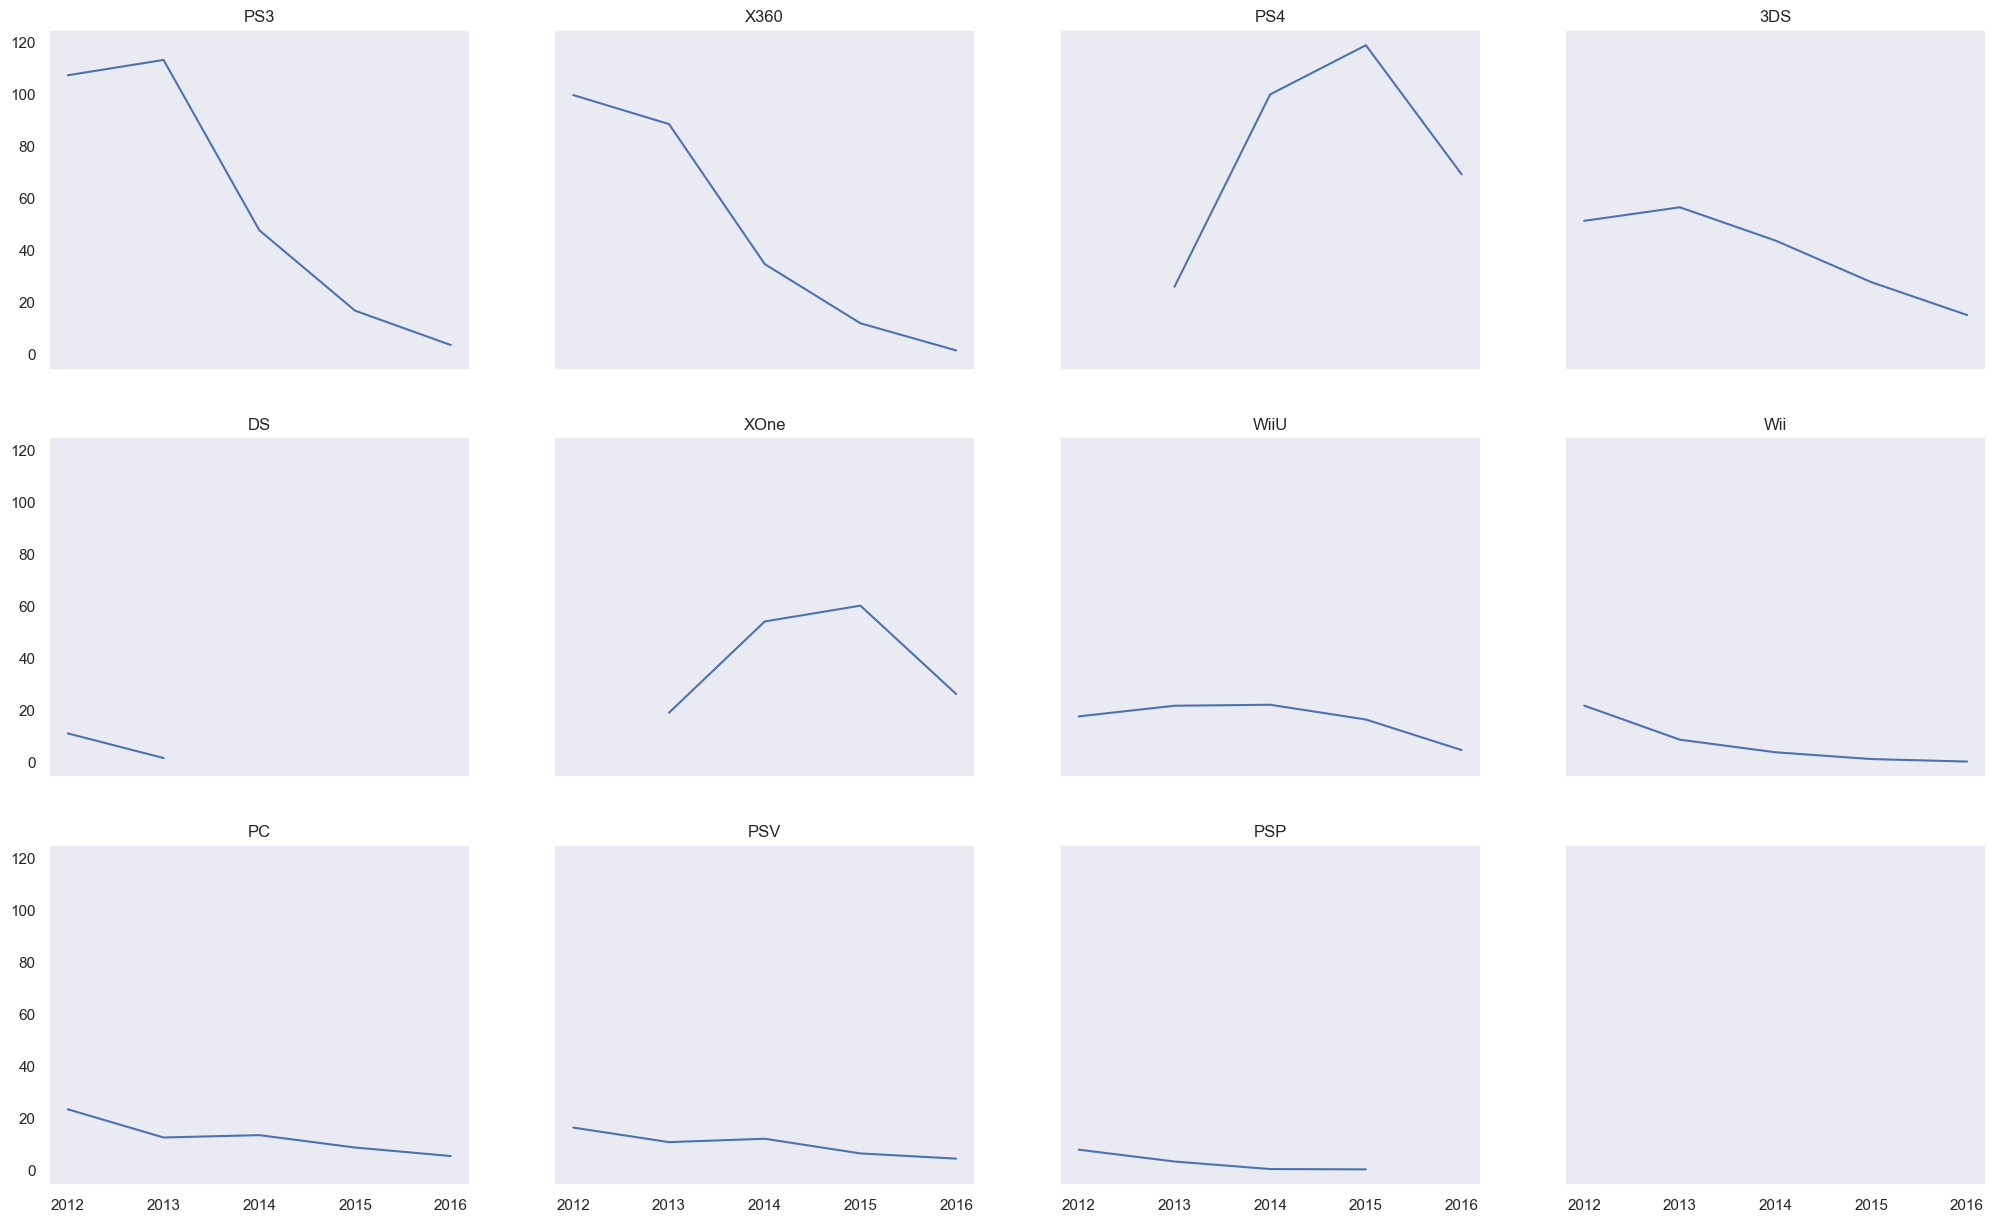

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25, 15), sharex=True, sharey=True)

subplots = cycle(ax.flat)

for platform in actual_df.platform.unique():
    subplot = next(subplots)
    sales_chart = actual_df.query('platform == @platform').groupby('year_of_release').total_sales.sum()
    subplot.set_title(platform)
    subplot.plot(sales_chart)

subplot.set_xticks(actual_df.year_of_release.unique())
plt.show()

**conclusion**
1. 2016 data is incomplete by convention, we can ignore it 
2. the PS4 and XOne platforms are growing. PS4 sales are almost twice as high, this platform is in the lead
4. WiiU never managed to take off, which is a pity.

### global games' sale by platforms

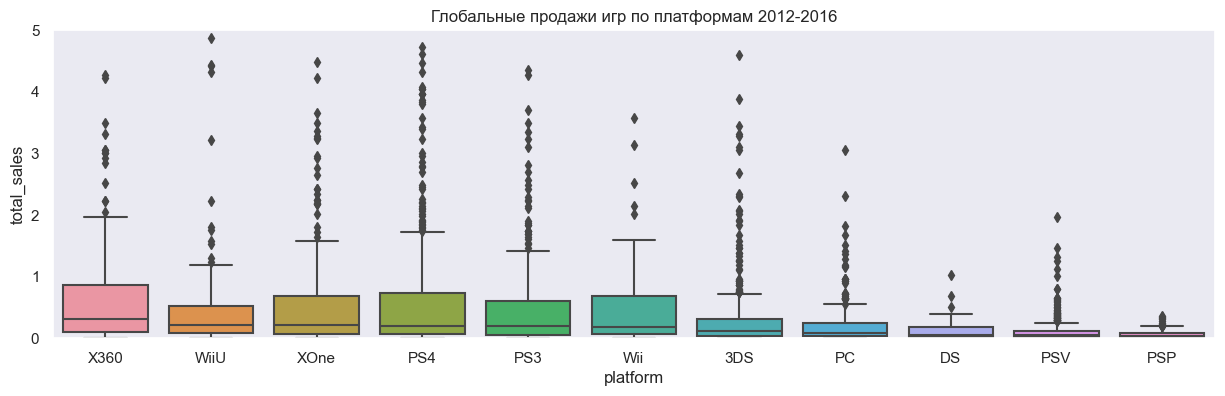

In [16]:
plt.figure(figsize=(15,4))
# в данных много вбросов. Придется их ограничивать
plt.ylim(0,5)
plt.title('Глобальные продажи игр по платформам 2012-2016')
# отсортирую ящики по возрастанию медианы
mean_by_sales = actual_df.groupby('platform').total_sales.median().sort_values(ascending=False)
# рисую график
sns.boxplot(data=actual_df, x='platform', y='total_sales', order=mean_by_sales.index);

**Conclusions**.
- There are a lot of throw-ins in the data. Obviously, some games make huge profits. While most games don't "shoot out"
- on average, the highest sales are on the Xbox360. Perhaps it's a matter of the number of devices in hand. But it should be kept in mind that PS4, XOne, PS3, 3DS platforms have seen many hits that have pushed average sales for these platforms upwards
- new game releases for PS4, Wii, XOne platforms in 2012-2016 sold more or less equally, but sales for Wii are more stable
- games on handheld platforms bring in significantly less money

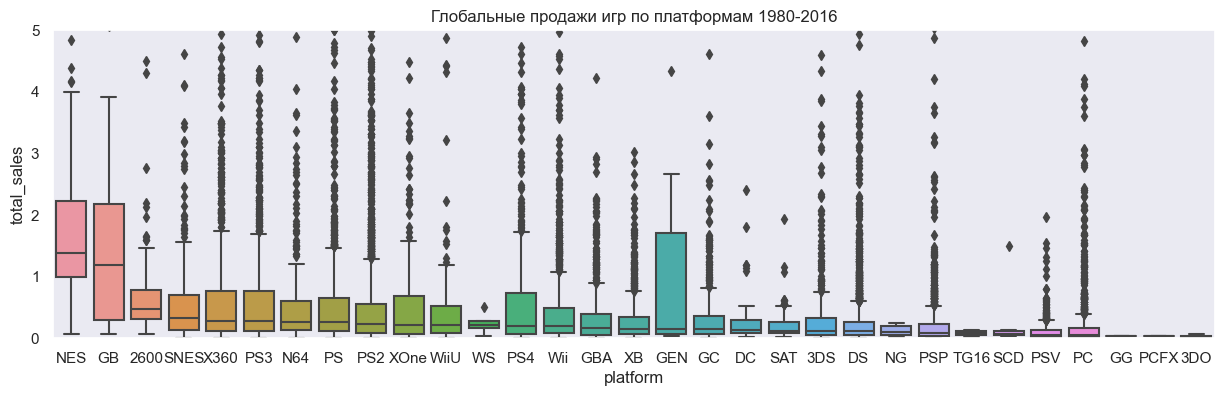

In [17]:
plt.figure(figsize=(15,4))
# в данных много вбросов. Придется их ограничивать
plt.ylim(0,5)
plt.title('Глобальные продажи игр по платформам 1980-2016')
# отсортирую ящики по возрастанию медианы
mean_by_sales = df.groupby('platform').total_sales.median().sort_values(ascending=False)
# рисую график
sns.boxplot(data=df, x='platform', y='total_sales', order=mean_by_sales.index);

**conclusions**
* The highest sales were for games on the Nintendo platform (NES and GameBoy). Now that's history, but before the PlayStation came out, Nintendo was the only player in the market and enjoyed their monopoly position
* Sega Genesis games also sold well. Here, by the way, you can see how Sega hit SNES sales with a strategy of lower game prices 
* PS4 and XOne games are already selling as well as games for the previous generation (PS3, Xbox360). I think this is due to the higher price of nextgen games

### games' sales vs user ratings

In [18]:
corr_df = actual_df.copy()

Корреляция продаж и оценок пользователей 0.44%


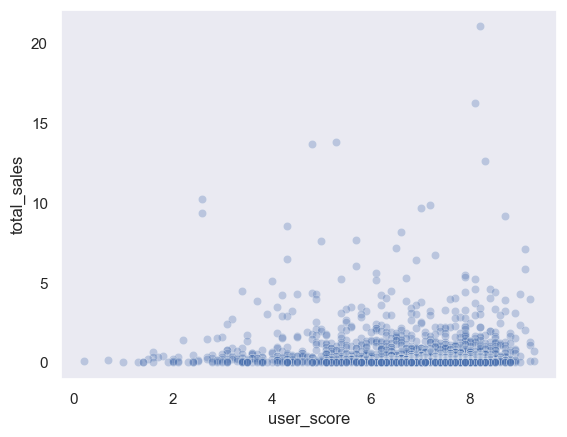

In [19]:
# корреляция продаж и оценки пользователей
print(f'Correlation of sales and user ratings {corr_df.user_score.corr(corr_df.total_sales):.2%}')
sns.scatterplot(data=corr_df, x='user_score', y='total_sales', alpha=0.3);

Корреляция продаж и оценок критиков 30.82%


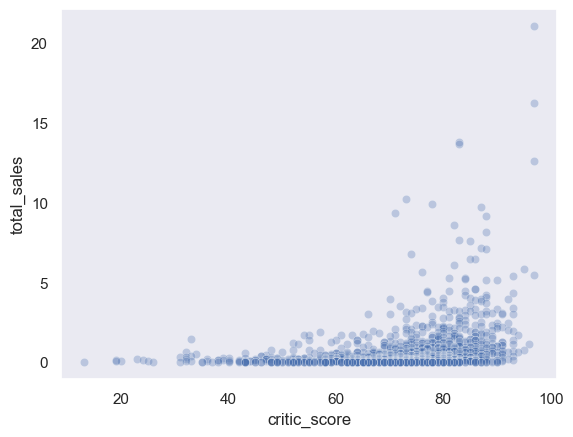

In [20]:
# корреляция продаж и оценок критиков
print(f'Корреляция продаж и оценок критиков {corr_df.critic_score.corr(corr_df.total_sales):.2%}')
sns.scatterplot(data=corr_df, x='critic_score', y='total_sales', alpha=0.3);

Корреляция оценок пользователей и оценок критиков 51.77%


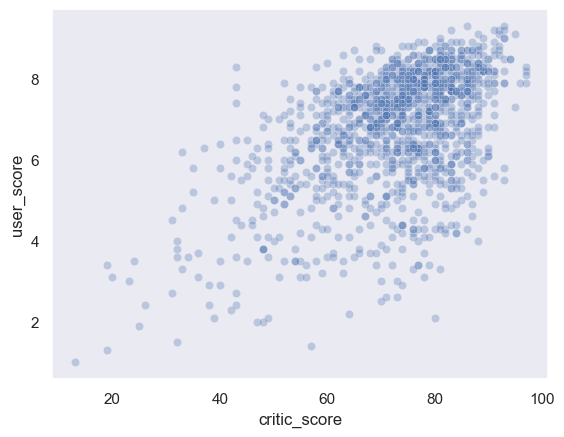

In [21]:
print(f'Корреляция оценок пользователей и оценок критиков {corr_df.critic_score.corr(corr_df.user_score):.2%}')
sns.scatterplot(data=corr_df, x='critic_score', y='user_score', alpha=0.3);

**conclusions**
* there is no correlation between game sales and user reviews
* there is a strong direct correlation between game sales and critics' scores. it is worth taking into account critics' opinions when forecasting game sales
* there is a strong direct correlation between users' scores and critics' scores. This may indicate both that critics and players often evaluate games equally, and that the evaluation of one influences the evaluation of the other

### general distribution of games by genre

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

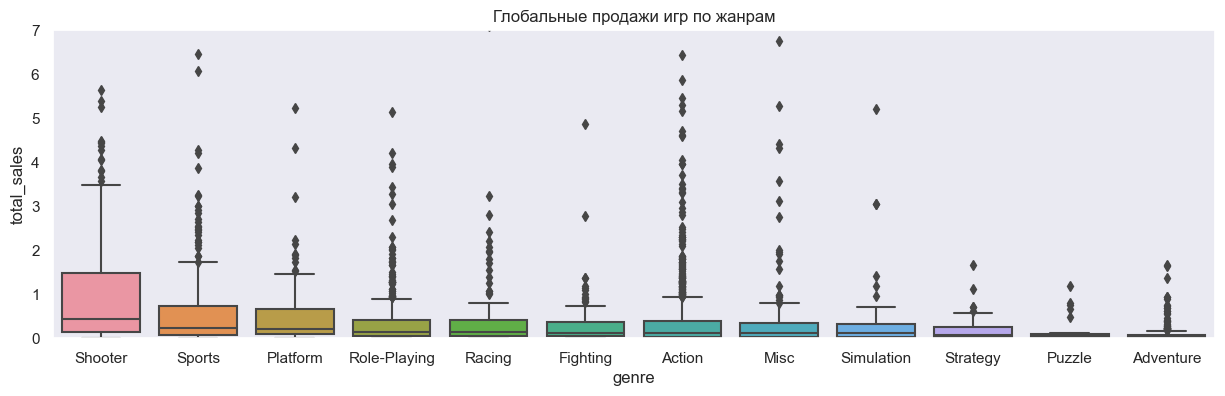

In [25]:
display(actual_df.genre.value_counts())
plt.figure(figsize=(15,4))
plt.ylim(0,7)
plt.title('Global games sales by genres')
mean_genre_by_sales = actual_df.groupby('genre').total_sales.median().sort_values(ascending=False)
sns.boxplot(data=actual_df, x='genre', y='total_sales', order=mean_genre_by_sales.index);

**conclusions**
* most of all games were released after 2012 in Action genre, with RPG in second place with a significant lag
* Puzzles and Strategy have been released the least
*Shooters are best-selling, but not many new titles are coming out (5th place)
* In second place in sales are sports games. This is probably the most stable genre. Many games come out year after year and have their own loyal fan-buyers.
* games in the Adventure genre make the least money, but game creators don't give up trying and keep releasing them
* it would be good to do an analysis by year of sales rather than releases, if there were such data 

## user profiles (for NA, EU, JP regions)

I will define a portrait based on the following data for the last 10 years (it does not make sense to analyze a longer period, because user behavior changes quickly):
* sales by year
* sales by platform
* sales by genre
* sales by age rating
* correlation of sales and critics' ratings

### data preparation

In [26]:
# подготовлю датафрейм для построения графиков
df_melted = df[df['year_of_release'] > 2006].copy()
df_melted = df_melted.melt(
    id_vars=['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'rating'], 
    value_name='sales', 
    var_name='region', 
    value_vars=['na_sales', 'eu_sales', 'jp_sales']
    )
df_melted.region = df_melted.region.str[:2]
df_melted.region = df_melted.region.str.upper()

### sales by year

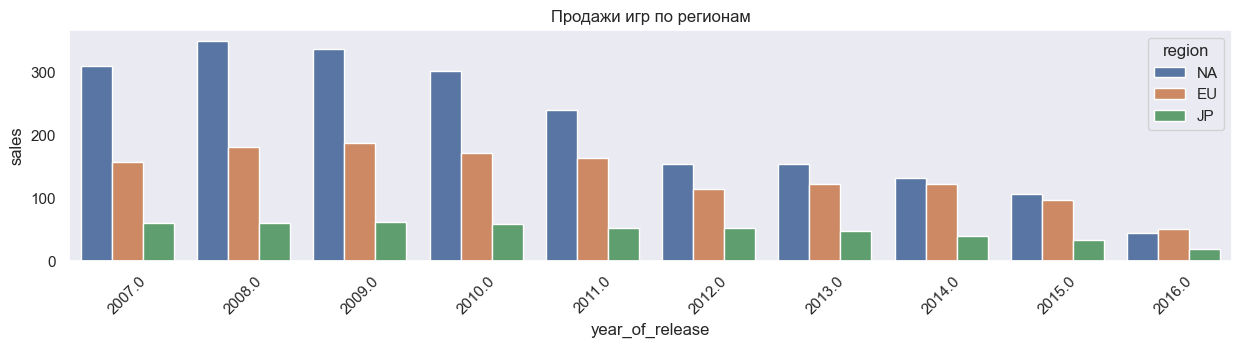

In [27]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.title('Sales by regions')
sns.barplot(data=df_melted, x='year_of_release', y='sales', estimator=sum, hue='region', ci=None)
plt.show()

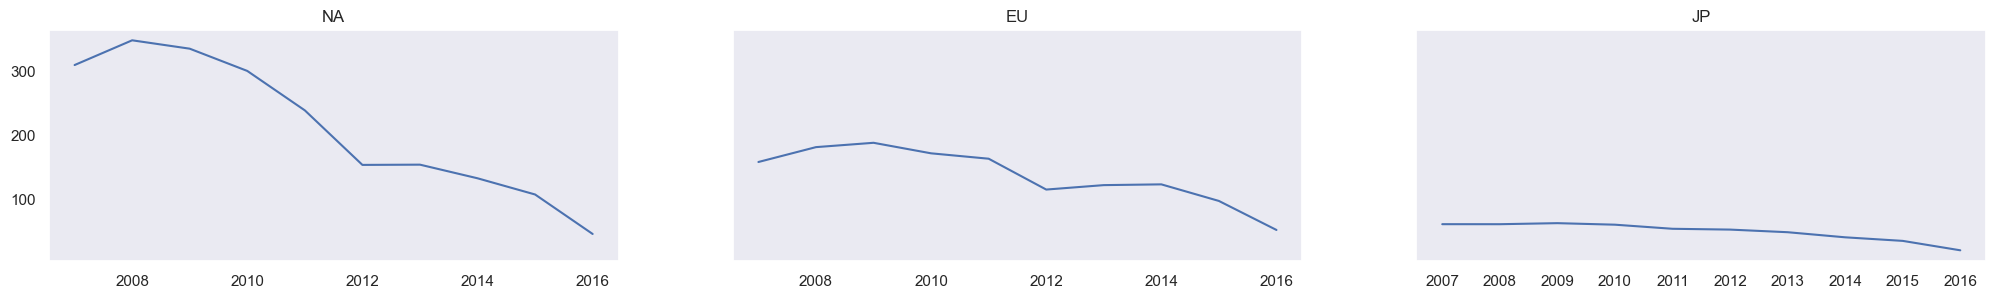

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 3), sharey=True)

subplots = cycle(ax.flat)

for region in df_melted.region.unique():
    subplot = next(subplots)
    chart = df_melted.query('region == @region').groupby('year_of_release').sales.sum()
    subplot.set_title(region)
    subplot.plot(chart)

subplot.set_xticks(df_melted.year_of_release.unique())
plt.show()

### sales by platforms

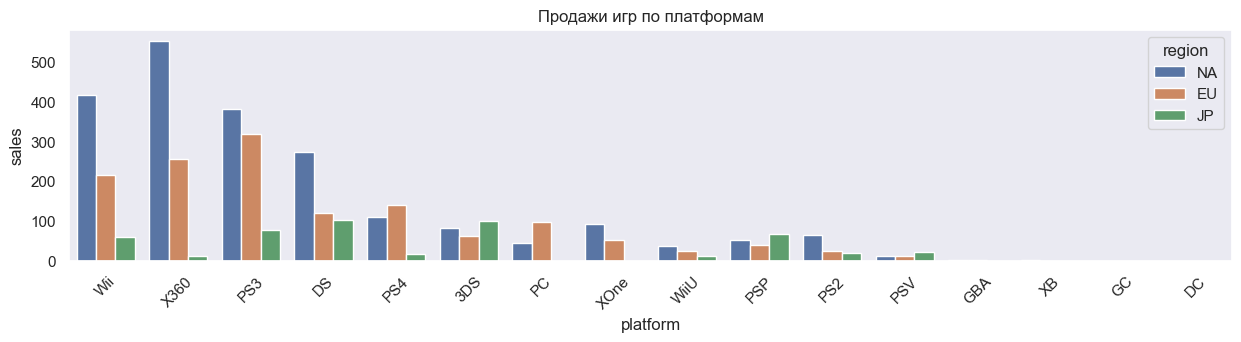

In [106]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.title('Sales by platforms')
sns.barplot(data=df_melted, x='platform', y='sales', estimator=sum, hue='region', ci=None)
plt.show()

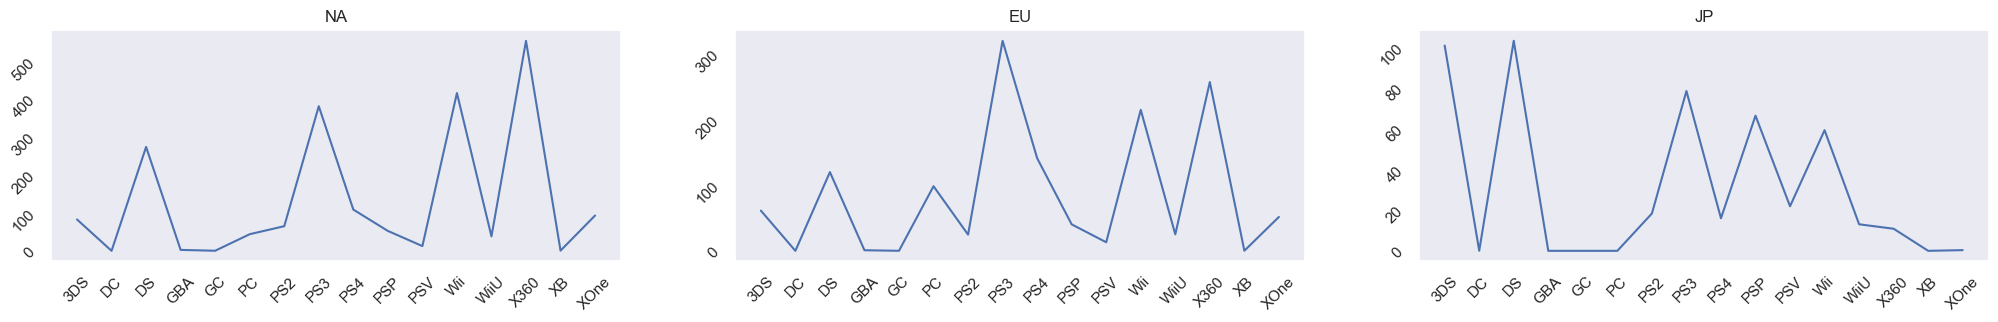

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 3))

subplots = cycle(ax.flat)

for region in df_melted.region.unique():
    subplot = next(subplots)
    chart = df_melted.query('region == @region').groupby('platform').sales.sum()
    subplot.set_title(region)
    subplot.tick_params(labelrotation=45)
    subplot.plot(chart)

plt.show()

### sales by genres

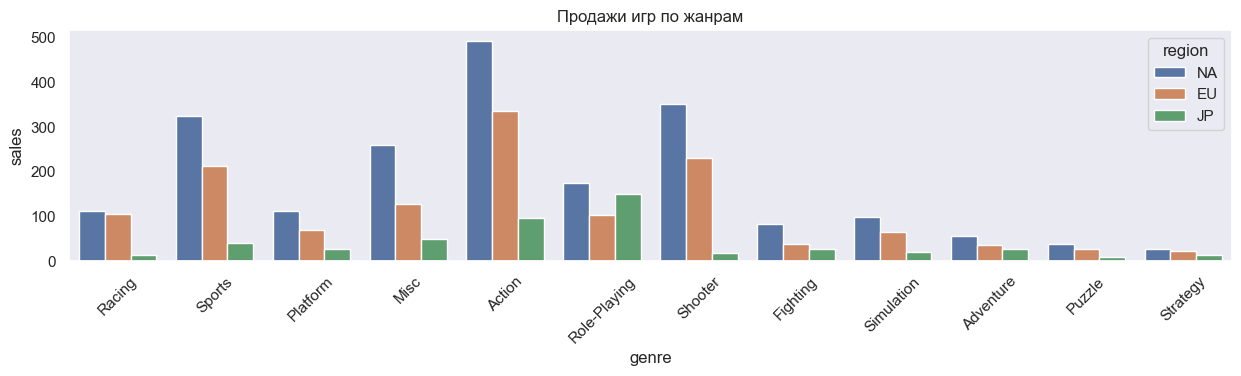

In [109]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.title('Продажи игр по жанрам')
sns.barplot(data=df_melted, x='genre', y='sales', estimator=sum, hue='region', ci=None)
plt.show()

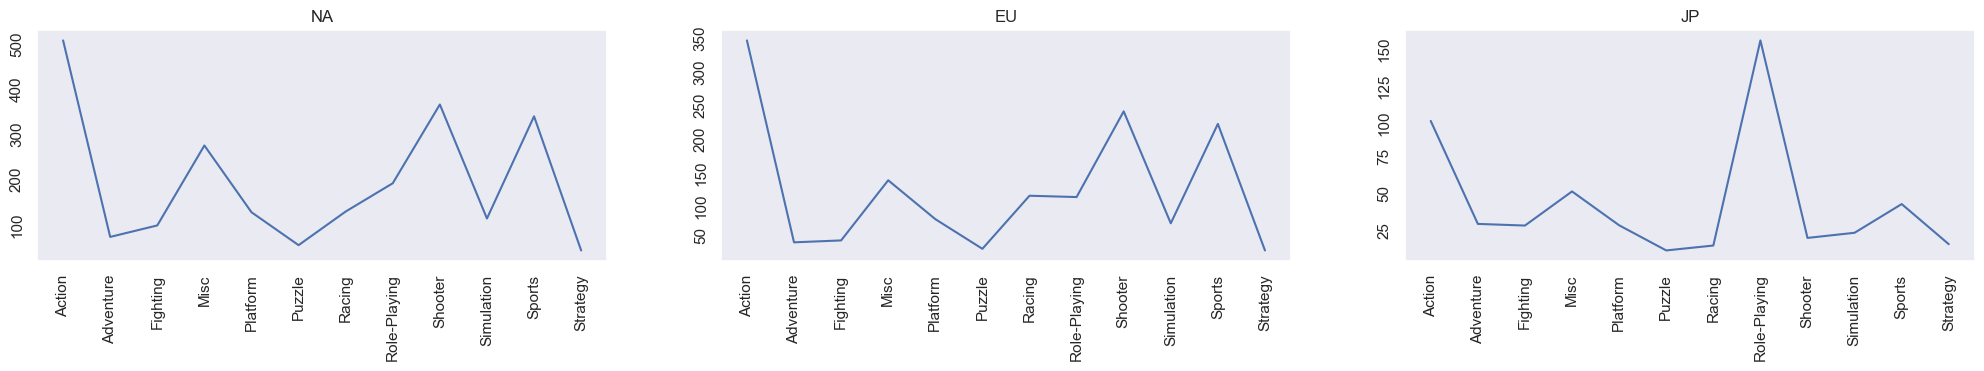

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 3))

subplots = cycle(ax.flat)

for region in df_melted.region.unique():
    subplot = next(subplots)
    chart = df_melted.query('region == @region').groupby('genre').sales.sum()
    subplot.set_title(region)
    subplot.tick_params(labelrotation=90)
    subplot.plot(chart)

plt.show()

### sales by age rating

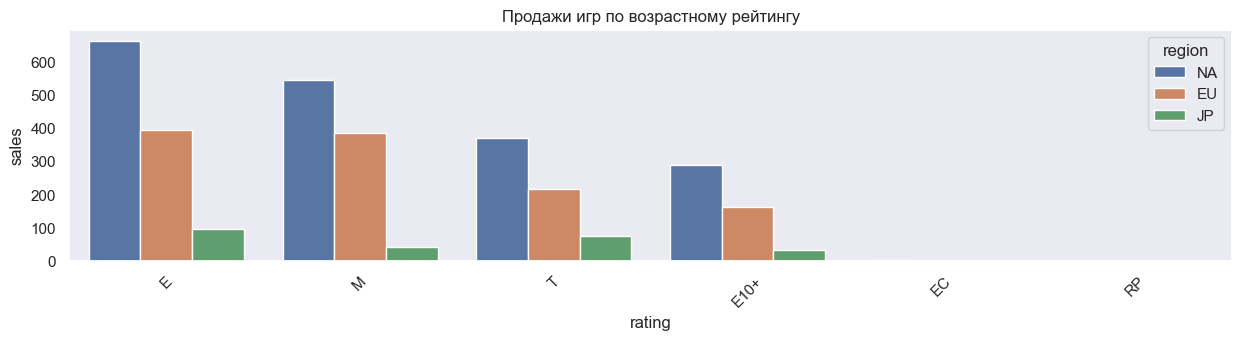

In [108]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.title('Sales by age rating')
sns.barplot(data=df_melted, x='rating', y='sales', estimator=sum, hue='region', ci=None)
plt.show()

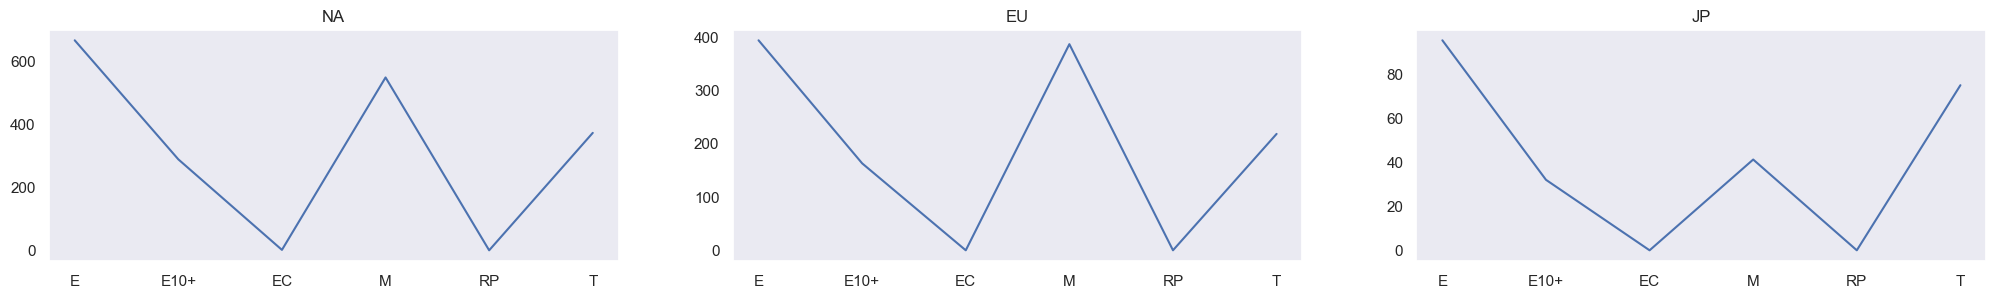

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 3))

subplots = cycle(ax.flat)

for region in df_melted.region.unique():
    subplot = next(subplots)
    chart = df_melted.query('region == @region').groupby('rating').sales.sum()
    subplot.set_title(region)
    subplot.plot(chart)

plt.show()

### **user profiles**

1. **NA - North America** plays action and shooter games on XBox with no age restrictions  
    * from 2007 to 2011 players bought significantly more games than players in other regions. In the last 5 years there has been a decline in game purchases in the region. Probably it is connected with the spread of subscription-based game sales model
    * The most popular platforms (in order of decreasing popularity) are Xbox360, Wii, PS3, DS. Notably, PS4 games are already selling better than Xbox One games, although PS3 games have sold worse in North America than Xbox 360 games
    * Users prefer games in the Action, Shooter and Sport genres. The other genres are not neglected either
    * Games rated E (Everyone), M (Mature), T (Teen) and E10+ (Everyone 10 and older) lead in sales. Many people play adult games and buy them.  
2. **EU - European Union** plays action and shooter games for adults on Playstation  
    * Game sales are declining, as they are in NA, but the rate of decline is much lower. As a result, more games were sold in EU in 2016 than in NA
    * the most popular platform in EU is PS3. As a consequence, the PS4 is noticeably more popular than the XOne. Sales of PS4 games are even higher than in NA. It is noteworthy that more games for PC are sold in Europe than anywhere else
    * The genre preferences of EU players are the same as those of NA players. A special feature is the popularity of games of the Racing genre.
    * EU players prefer more adult games. Games rated Everyone are less popular. Sales of games rated Mature are almost the same as sales of games rated Everyone
3. **JP - Japan** plays on DS or 3DS JRPGs until it grows  
    * Game sales are stable, the market seems more mature. But there is still a decline in the last 10 years
    * local, Japanese platforms are popular in JP: Nintendo, Sony. And there are a lot of games sold in Japan for handheld platforms: 3DS, DS, PSP. Games for Microsoft platforms practically do not sell
    * The most popular genre is Role-Playing. Japan even has its own unique genre, Japan-RPG.
    * Games rated M and E10+ are much less popular in JP than in other regions. Mostly players buy games rated Everyone and Teen

## hypothesis

### average user ratings for Xbox One and PC platforms are the same

Hypothesis H_0: User_score of "XOne" owners = user_score of "PC" owners  
Alternative hypothesis H_1: User evaluation (user_score) of "XOne" owners ≠ user evaluation (user_score) of "PC" owners

* Student's t-test was used to test the hypothesis, because the samples are independent and subject to a normal distribution
* since the samples have different dispersions, the parameter equal_var=False was used
* alpha was chosen = 5% because insignificant amount of data is available, and only approximate conclusions can be drawn on the basis of this sample 

выборка XOne: 182 Стандартное отклонение: 1.380940564592144
выборка PC: 206 Стандартное отклонение: 1.6644650783835682


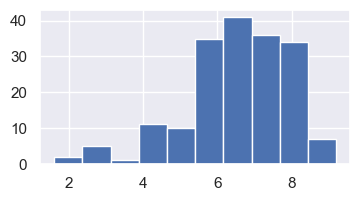

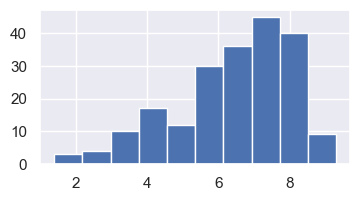

p-value 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу. Рейтинги могут быть одинаковые


In [98]:
xone_score = actual_df.query('platform == "XOne"').user_score.dropna()
pc_score = actual_df.query('platform == "PC"').user_score.dropna()

print('выборка XOne:', len(xone_score), 'Стандартное отклонение:', xone_score.std())
print('выборка PC:', len(pc_score), 'Стандартное отклонение:', pc_score.std())

xone_score.hist(figsize=(4,2))
plt.show()
pc_score.hist(figsize=(4,2))
plt.show()

# вызов метода для проверки гипотезы
results = st.ttest_ind(xone_score, pc_score , equal_var=False)
alpha = 0.05

# вывод значения p-value на экран 
print('p-value', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу. Рейтинги разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Рейтинги могут быть одинаковые')

### average user ratings of Action and Sports genres are different

Null Hypothesis H_0: Action genre user_score = Sports genre user_score
Alternative hypothesis H_1: User rating (user_score) of "Action" genre ≠ user rating (user_score) of "Sports" genre

* Student's t-test was used to test the hypothesis, because the samples are independent and subject to a normal distribution
* since the samples have different dispersions, the parameter equal_var=False was used
* alpha was chosen = 5% because insignificant amount of data is available, and only approximate conclusions can be drawn on the basis of this sample 

выборка Action: 523 Стандартное отклонение: 1.3744395401161926
выборка Sports: 195 Стандартное отклонение: 1.7386461108301285


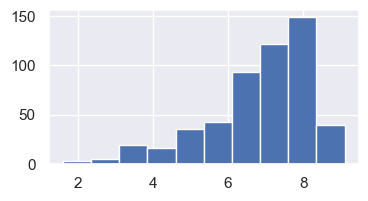

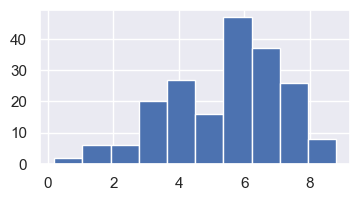

p-value 4.24307776572644e-20
Отвергаем нулевую гипотезу. Рейтинги разные


In [99]:
action_score = actual_df.query('genre == "Action"').user_score.dropna()
sports_score = actual_df.query('genre == "Sports"').user_score.dropna()

print('выборка Action:', len(action_score), 'Стандартное отклонение:', action_score.std())
print('выборка Sports:', len(sports_score), 'Стандартное отклонение:', sports_score.std())

action_score.hist(figsize=(4,2))
plt.show()
sports_score.hist(figsize=(4,2))
plt.show()

# вызов метода для проверки гипотезы
results = st.ttest_ind(action_score, sports_score , equal_var=False)
alpha = 0.05

# вывод значения p-value на экран 
print('p-value', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу. Рейтинги разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Рейтинги могут быть одинаковые ')

## overall conclusion

* Market
    - Based on the available data over the past 36 years, almost 12,000 games have been released for 31 gaming platforms. An average of 370 games per platform
    - 2003 saw the first big spike in game releases after the PS2
    - an increase in the release of games for a new platform occurs 2-3 years after its release
    - new game releases declined from 2011 to 2015
* Platforms
    - On average new platforms appear and old ones disappear every 5-6 years. Almost all platforms have the same development cycle: growth during the first three years, then decline
    - The PC platform does not change much over time, games continue to be released for it and bring money
    - As of 2016, sales of games for only two platforms are growing: PS4 and Xbox One. PS4 games are selling twice as well as Xbox One games
    - Some games are generating tremendous revenue. While most games don't "shoot out"
    - From 2012 to 2016, the highest game sales were for the Xbox360. Buyers are mostly from North America.
    - Games on handheld platforms generate significantly less revenue
    - PS4, XOne, PS3, 3DS had many hits which pushed the average sales for these platforms up
* Reviews
    - for 2012-2016 and current platforms, user reviews have no effect on game sales
    - It is worth considering the opinion of critics when predicting game sales. There is a strong direct correlation between game sales and critics' reviews
    - for less popular and older consoles, there is a connection, albeit weak, between user reviews and sales
    - at the same time critics' opinions have less impact on sales of games for other consoles
* Genres
    - most games have been released since 2012 in Action genre, followed by RPG in second place
    - Puzzles and Strategy games have been released the least
    - shooters are best-selling, but not many new titles are released (5th place)
    - In second place in sales - sports games. This is probably the most stable genre. Many games come out of year to year and have their own loyal fan-buyers
    - games in the Adventure genre are the least profitable.
* Portraits of users by region
    - NA: Plays action and shooter games without age restrictions on XBox
    - EU: Plays action and shooter games for adults on PlayStation
    - JP: Plays Role-Playing Games on DS or 3DS until he grows up
* Hypotheses
    - 'Average user ratings for Xbox One and PC platforms are the same' - hypothesis confirmed, ratings may be the same
    - 'Average user ratings for Action and Sports genres are different' - hypothesis confirmed, ratings may be different